In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
csv="/content/drive/MyDrive/Deep Learning Individual Assignment 2/final_zimbabwe_property_listings_complete.csv"
images="/content/drive/MyDrive/Deep Learning Individual Assignment 2/images"

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv(csv)

In [5]:
df.shape

(1613, 15)

In [6]:
df.columns

Index(['scraped_page', 'title', 'detail_url', 'currency', 'price',
       'building_area', 'building_unit', 'land_area', 'land_unit',
       'property_type', 'bedrooms', 'bathrooms', 'location', 'image_count',
       'image_filenames'],
      dtype='object')

In [7]:
df.head(1)

,scraped_page,title,detail_url,currency,price,building_area,building_unit,land_area,land_unit,property_type,bedrooms,bathrooms,location,image_count,image_filenames
0,1,Developers Dream,https://www.property.co.zw/for-sale/houses-bls...,USD,190000.0,180.0,m²,1352.0,m²,3 Bedroom House,3.0,1.0,Belvedere,1,df03d95d0b_0.webp


In [8]:
df.currency.value_counts()

,count
currency,
USD,1610


# the following columns are not necessary for model training:
- currency
- detail_url
- scrapped_page
- title
- building_unit
- land_unit
- image_count
- image filenames(although necessary to get image)


In [9]:
df.building_unit.value_counts()

,count
building_unit,
m²,1613


In [10]:
df.land_unit.value_counts()

,count
land_unit,
m²,1613


In [11]:
unwanted="currency,detail_url,scraped_page,title,building_unit,land_unit,image_count".split(',')

In [12]:
unwanted

['currency',
 'detail_url',
 'scraped_page',
 'title',
 'building_unit',
 'land_unit',
 'image_count']

In [13]:
numeric=df.drop(unwanted,axis=1)

In [14]:
numeric.head()

,price,building_area,land_area,property_type,bedrooms,bathrooms,location,image_filenames
0,190000.0,180.0,1352.0,3 Bedroom House,3.0,1.0,Belvedere,df03d95d0b_0.webp
1,95000.0,120.0,NaN,2 Bedroom Flat,2.0,1.0,Avondale,41c6aa94bc_0.webp
2,105000.0,3410.0,410.0,3 Bedroom House,3.0,NaN,NaN,483115d1c1_0.webp
3,875000.0,NaN,8000.0,NaN,NaN,NaN,Borrowdale,ac7160491a_0.webp
4,60000.0,442.0,442.0,NaN,NaN,NaN,Harare,1d7f22fc05_0.webp


In [15]:
import seaborn as sns

# Visualising missing values

<Axes: >

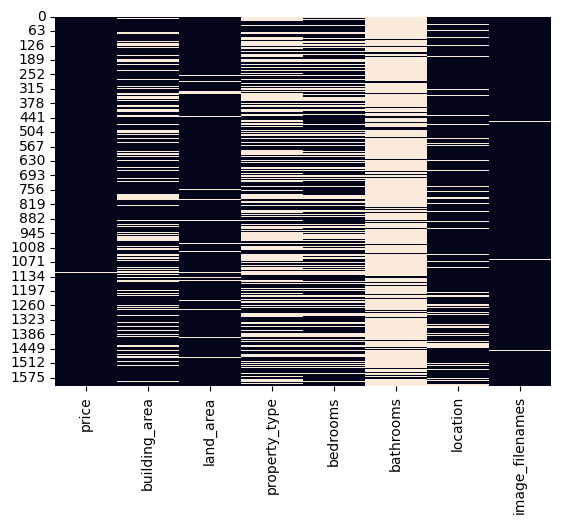

In [16]:
sns.heatmap(numeric.isnull(),cbar=False)

# according to above output, bathrooms feature barely has any data

let's confirm this with actual figures

In [17]:
numeric.isnull().sum()

,0
price,3
building_area,429
land_area,77
property_type,761
bedrooms,620
bathrooms,1421
location,244
image_filenames,19


In [18]:
missing_bathrooms=numeric.isnull().sum()['bathrooms']

In [19]:
print(f"{missing_bathrooms}/{numeric.shape[0]} bathrooms missing...")

1421/1613 bathrooms missing...


In [20]:
df.image_count.nunique()

2

checking to see if it's "safe" to drop `image_count` feature

In [21]:
df.image_count.value_counts()

,count
image_count,
1,1594
0,19


**according to above output, the count is either 1 or 0 so it's safe to drop. would have been a problem if there were counts more than one since that would mean we need to locate multiple images in folder for one observation**

In [22]:
df.property_type.head()

,property_type
0,3 Bedroom House
1,2 Bedroom Flat
2,3 Bedroom House
3,NaN
4,NaN


In [23]:
all_bedroom_counts=df.property_type.dropna().apply(lambda x:"Bedroom" in x)

In [24]:
all_bedroom_counts.shape

(852,)

In [25]:
all_bedroom_counts.sum()

np.int64(796)

**according to above output, not all `property_type` values are giving info on bedroom count which would have made them redundant since we already have a bedroom feature but that's not the case so will futher investigate what else is stated there**

In [26]:
not_bedroom_counts=df.property_type.dropna().apply(lambda x:not("Bedroom" in x))

In [27]:
non_bedroom=df.property_type.dropna()[not_bedroom_counts]

In [28]:
non_bedroom.head()

,property_type
26,4 bed duplex
30,3 bedroom townhouse
34,3 Bed house
41,3 bedroom house
54,6 bedroom house


# refining the search

In [29]:
not_bedroom_counts=df.property_type.dropna().apply(lambda x:not(("Bedroom" in x)|("bedroom" in x)))

In [30]:
non_bedroom=df.property_type.dropna()[not_bedroom_counts]

In [31]:
non_bedroom.head()

,property_type
26,4 bed duplex
34,3 Bed house
133,2 bed flat
134,2 bed flat
181,2 bed flat


**"bed" still hints at bedrooms. and according to earlier output, `property_type` has more missing values than `bedrooms` so it makes this feature redundant**

In [32]:
unwanted.append("property_type")

In [33]:
numeric.drop("property_type",axis=1,inplace=True)

In [34]:
numeric.shape

(1613, 7)

In [35]:
numeric.head()

,price,building_area,land_area,bedrooms,bathrooms,location,image_filenames
0,190000.0,180.0,1352.0,3.0,1.0,Belvedere,df03d95d0b_0.webp
1,95000.0,120.0,NaN,2.0,1.0,Avondale,41c6aa94bc_0.webp
2,105000.0,3410.0,410.0,3.0,NaN,NaN,483115d1c1_0.webp
3,875000.0,NaN,8000.0,NaN,NaN,Borrowdale,ac7160491a_0.webp
4,60000.0,442.0,442.0,NaN,NaN,Harare,1d7f22fc05_0.webp


# inspecting location

In [36]:
numeric.location.nunique()

37

In [37]:
numeric.location.value_counts()

,count
location,
Harare,767
Bulawayo,151
Borrowdale,80
Greendale,53
Marlborough,42
Mount Pleasant,41
Waterfalls,31
Eastlea,19
Avondale,19


nearly half of the houses are labelled Harare but looking at the other locations, they are also in Harare except Bulawayo. making this column misleading

In [38]:
unwanted.append("location")

In [39]:
numeric.drop("location",axis=1,inplace=True)

In [40]:
numeric.head()

,price,building_area,land_area,bedrooms,bathrooms,image_filenames
0,190000.0,180.0,1352.0,3.0,1.0,df03d95d0b_0.webp
1,95000.0,120.0,NaN,2.0,1.0,41c6aa94bc_0.webp
2,105000.0,3410.0,410.0,3.0,NaN,483115d1c1_0.webp
3,875000.0,NaN,8000.0,NaN,NaN,ac7160491a_0.webp
4,60000.0,442.0,442.0,NaN,NaN,1d7f22fc05_0.webp


inspecting price

<Axes: >

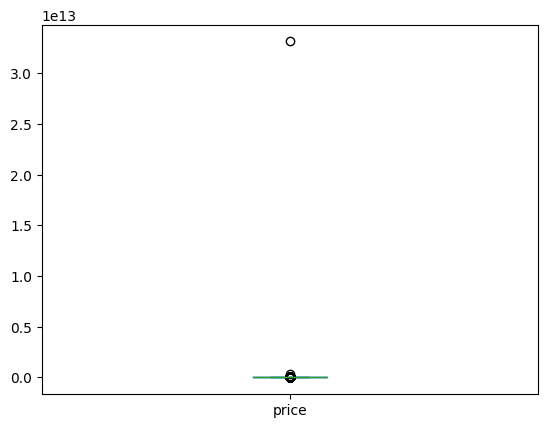

In [41]:
numeric.price.plot.box()

<Axes: ylabel='Frequency'>

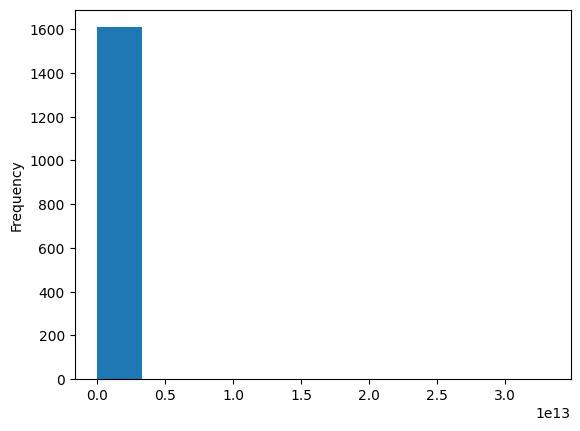

In [42]:
numeric.price.plot.hist()

<Axes: ylabel='Density'>

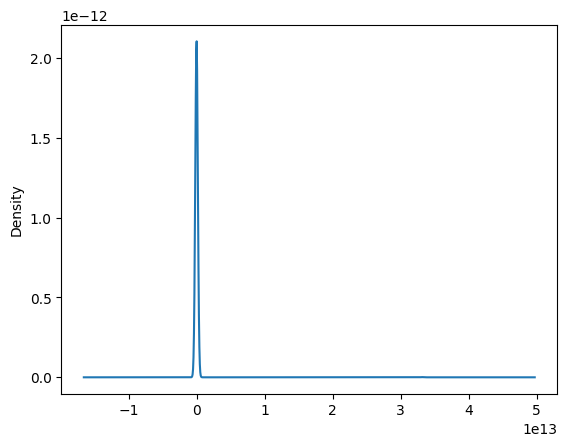

In [43]:
numeric.price.plot.kde()

all values appear to be nearly zero, probably due to outliers. but just to be sure, let's see if the column is truly a numeric data type

In [44]:
numeric.price.dtype

dtype('float64')

feature is indeed numeric. now let's see the largest values

In [45]:
df.price.max()

33137800000000.0

In [46]:
len("33137800000000")

14

14 digits for a house. that's more than 10Billion and for a currency that's in USD this is unrealistic

let's see how many house have these outliers for prices

In [47]:
df.price.sort_values(ascending=False).head(10)

,price
1377,3.313780e+13
868,3.128000e+11
304,1.790000e+10
38,1.000000e+09
782,2.500000e+08
596,6.690000e+07
1378,4.132800e+07
1525,1.300000e+07
588,9.000000e+06
986,7.500000e+06


# filtering out anything above 5million

In [48]:
numeric.shape

(1613, 6)

In [49]:
numeric = numeric[numeric.price <= 5000000]

In [50]:
numeric.shape

(1595, 6)

<Axes: >

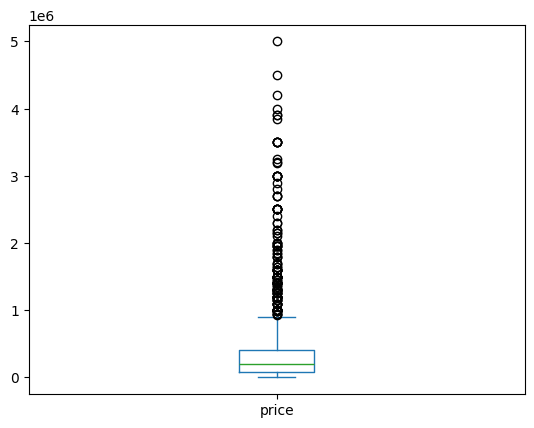

In [51]:
numeric.price.plot.box()

we're getting somewhere

In [52]:
numeric.price.sort_values(ascending=False).head(10)

,price
1295,5000000.0
1386,4500000.0
366,4200000.0
499,4000000.0
925,3900000.0
910,3900000.0
1316,3850000.0
785,3500000.0
27,3500000.0
1415,3500000.0


<Axes: ylabel='Density'>

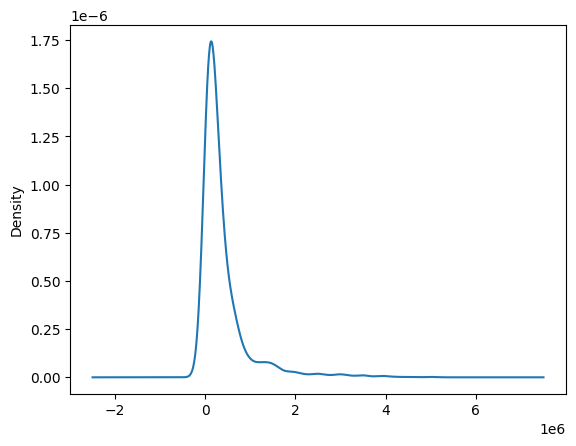

In [53]:
numeric.price.plot.kde()

<Axes: >

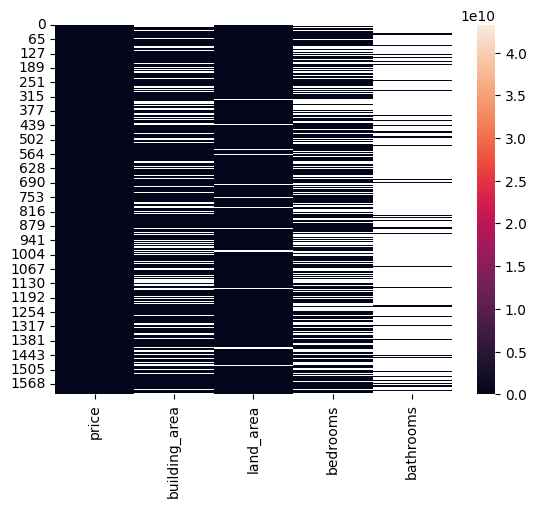

In [54]:
sns.heatmap(numeric.drop("image_filenames",axis=1))

# inspecting building_area

<Axes: >

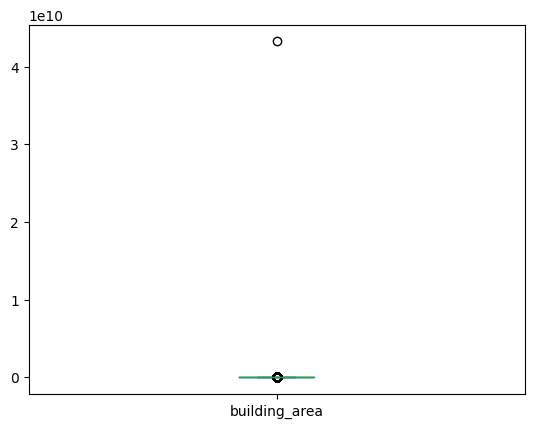

In [55]:
numeric.building_area.plot.box()

we may have a similar problem here

In [56]:
numeric.building_area.sort_values(ascending=False).head()

,building_area
812,4.326638e+10
878,1.403000e+07
1596,4.428328e+06
568,4.315000e+06
409,3.210158e+06


**billions of square meters are just unrealistic**

In [57]:
numeric=numeric[numeric.building_area<=1000]

In [58]:
numeric.shape

(887, 6)

<Axes: >

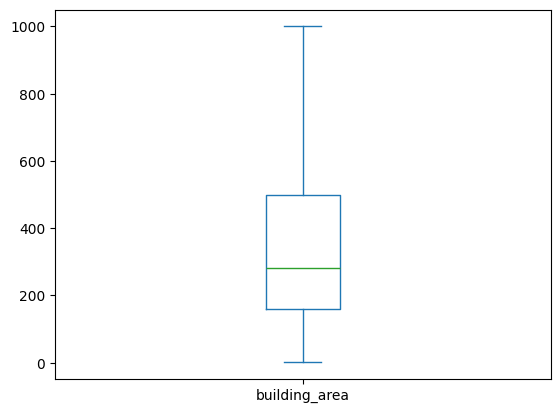

In [59]:
numeric.building_area.plot.box()

<Axes: >

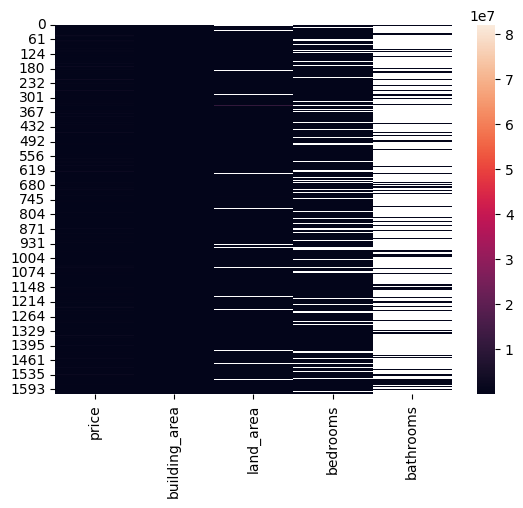

In [60]:
sns.heatmap(numeric.drop("image_filenames",axis=1))

above operation has shrunk the dataset's size drastically but the features now have realistic values. let's further inspect land_area

<Axes: >

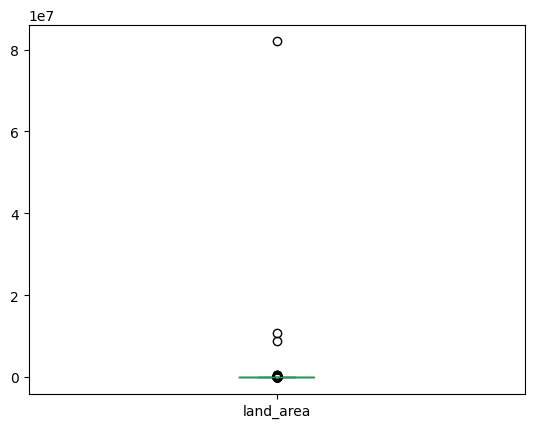

In [61]:
numeric.land_area.plot.box()

there's still some extreme values here

using the same operation for land_area

In [62]:
numeric=numeric[numeric.land_area<=1000]

In [63]:
numeric.shape

(397, 6)

<Axes: >

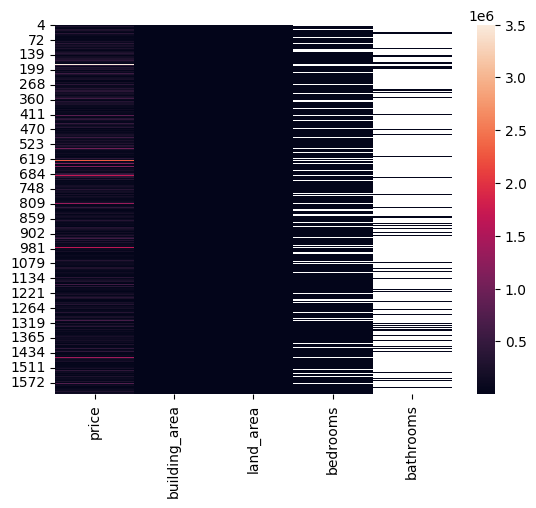

In [64]:
sns.heatmap(numeric.drop("image_filenames",axis=1))

inspecting bedrooms

In [65]:
numeric.bedrooms.sort_values(ascending=False)

,bedrooms
399,8.0
1188,8.0
1434,8.0
1134,6.0
459,6.0
...,...
1519,NaN
1537,NaN
1557,NaN
1574,NaN


nothing extreme here, just need to impute missing values

In [66]:
numeric.bathrooms.isnull().sum()

np.int64(344)

even after correcting other features, bathrooms still have 344 out of 397 missing values. imputing here would definitely mislead the model. so best approach at this point is to drop

In [67]:
numeric.drop("bathrooms",axis=1,inplace=True)

<Axes: >

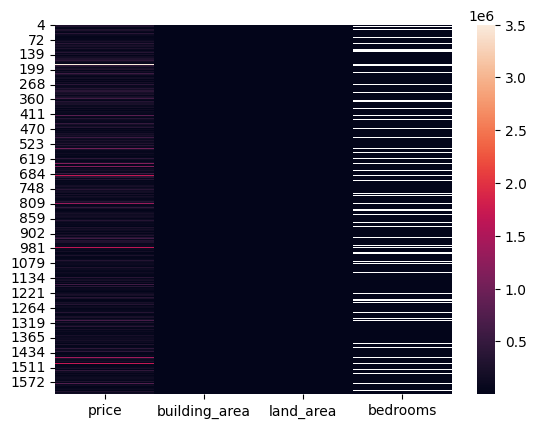

In [68]:
sns.heatmap(numeric.drop("image_filenames",axis=1))

now let's impute missing values

In [69]:
images=numeric["image_filenames"]
numeric=numeric.drop("image_filenames",axis=1)

In [70]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="mean")

In [71]:
imputed=imputer.fit_transform(numeric)

In [72]:
numeric=pd.DataFrame(imputed,columns=numeric.columns)

<Axes: >

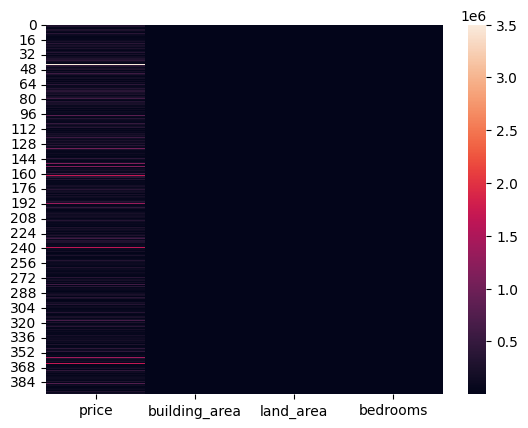

In [73]:
sns.heatmap(numeric)

price feature looks different from the rest, let me confirm if it's been imputed

In [74]:
numeric.price.isnull().sum()

np.int64(0)

yes imputed

In [75]:
numeric.head()

,price,building_area,land_area,bedrooms
0,60000.0,442.0,442.0,3.53869
1,270000.0,980.0,980.0,5.00000
2,300000.0,240.0,500.0,3.53869
3,70000.0,50.0,50.0,2.00000
4,35000.0,180.0,240.0,4.00000


In [78]:
numeric.isnull().sum()

,0
price,0
building_area,0
land_area,0
bedrooms,0
image_filenames,305


In [80]:
numeric.head(10)

,price,building_area,land_area,bedrooms,image_filenames
0,60000.0,442.0,442.0,3.53869,NaN
1,270000.0,980.0,980.0,5.00000,NaN
2,300000.0,240.0,500.0,3.53869,NaN
3,70000.0,50.0,50.0,2.00000,NaN
4,35000.0,180.0,240.0,4.00000,1d7f22fc05_0.webp
5,295000.0,208.0,400.0,3.53869,NaN
6,260000.0,157.0,500.0,3.00000,NaN
7,100000.0,200.0,450.0,3.00000,a51e6bcc53_0.webp
8,38000.0,150.0,300.0,3.00000,NaN
9,380000.0,240.0,500.0,3.00000,NaN


too many missing images. let's build model with the numeric feature for now then use object detection later

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

scaling down the features(except price)

In [83]:
scaler=StandardScaler()

In [90]:
target=numeric.price

In [92]:
independent=numeric.drop(["price","image_filenames"],axis=1)

In [93]:
scaled=scaler.fit_transform(independent)

In [94]:
numeric.head()

,price,building_area,land_area,bedrooms,image_filenames
0,60000.0,442.0,442.0,3.53869,NaN
1,270000.0,980.0,980.0,5.00000,NaN
2,300000.0,240.0,500.0,3.53869,NaN
3,70000.0,50.0,50.0,2.00000,NaN
4,35000.0,180.0,240.0,4.00000,1d7f22fc05_0.webp


In [95]:
scaled

array([[ 8.15912533e-01, -1.20924519e-01,  1.07799931e-15],
       [ 3.50457015e+00,  1.96532623e+00,  1.77361961e+00],
       [-1.93583449e-01,  1.03987272e-01,  1.07799931e-15],
       ...,
       [-3.58501110e-01,  1.03987272e-01, -6.53819041e-01],
       [-3.93483644e-01, -2.83791677e-01,  5.59900284e-01],
       [-8.88236625e-01, -1.25323905e+00, -1.86753837e+00]])

In [96]:
x_train,x_test,y_train,y_test=train_test_split(scaled,target,test_size=0.2,random_state=101)

In [97]:
from tensorflow.keras.layers import Input

In [100]:
model=Sequential([
    Input(shape=(3,)),
    Dense(8,activation="relu"),
    Dense(8,activation="relu"),
    Dense(1)
])

In [102]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

In [103]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss="mse",
    metrics=["mae"]
)

In [109]:
early_stopping=EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)

In [110]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),callbacks=[early_stopping])

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 117463302144.0000 - mae: 140949.5625 - val_loss: 51546411008.0000 - val_mae: 126738.3516
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 94999502848.0000 - mae: 146588.6875 - val_loss: 51583492096.0000 - val_mae: 127651.4609
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 47134736384.0000 - mae: 116003.6953 - val_loss: 51634278400.0000 - val_mae: 128518.9219
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 97855963136.0000 - mae: 141029.2500 - val_loss: 51725721600.0000 - val_mae: 129624.3125
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 106806845440.0000 - mae: 137099.0156 - val_loss: 51822379008.0000 - val_mae: 130571.8906
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 88636071936.0000 - mae: 125478.7500 - val_loss: 51950329856.0000 - val_mae: 131614.5781
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 62457491456.0000 - mae: 124632.5391 - val_loss: 520797

now to see if features from images makes the predictions better

In [111]:
numeric.head()

,price,building_area,land_area,bedrooms,image_filenames
0,60000.0,442.0,442.0,3.53869,NaN
1,270000.0,980.0,980.0,5.00000,NaN
2,300000.0,240.0,500.0,3.53869,NaN
3,70000.0,50.0,50.0,2.00000,NaN
4,35000.0,180.0,240.0,4.00000,1d7f22fc05_0.webp


In [112]:
type(independent)

pandas.core.frame.DataFrame

In [113]:
numeric.drop(independent.columns,axis=1,inplace=True)

In [116]:
x=pd.DataFrame(scaled,columns=independent.columns)

In [117]:
combined=x.join(numeric)

In [118]:
combined.head()

,building_area,land_area,bedrooms,price,image_filenames
0,0.815913,-0.120925,1.077999e-15,60000.0,NaN
1,3.504570,1.965326,1.773620e+00,270000.0,NaN
2,-0.193583,0.103987,1.077999e-15,300000.0,NaN
3,-1.143109,-1.641018,-1.867538e+00,70000.0,NaN
4,-0.493434,-0.904238,5.599003e-01,35000.0,1d7f22fc05_0.webp


getting rid of rows with missing images

In [119]:
combined.dropna(inplace=True)

In [120]:
combined.shape

(92, 5)

In [134]:
image_files = combined['image_filenames']
print(image_files.head())

4     1d7f22fc05_0.webp
7     a51e6bcc53_0.webp
12    35ade3b1af_0.webp
14    43ae0f61bc_0.webp
18    2dddad92e3_0.webp
Name: image_filenames, dtype: object


In [135]:
tabular_features = combined.drop(columns=['price', 'image_filenames'])
print(tabular_features.head())

    building_area  land_area  bedrooms
4       -0.493434  -0.904238  0.559900
7       -0.393484  -0.089902 -0.653819
12      -0.643359  -1.059350 -0.653819
14       1.105768   2.042882 -0.653819
18      -0.093633   1.240180 -0.653819


In [136]:
import numpy as np
y_full = np.log1p(combined['price'])
print(y_full.head())

4     10.463132
7     11.512935
12    10.463132
14    11.002117
18    12.301387
Name: price, dtype: float64


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, EfficientNetB0, MobileNetV2, Xception, DenseNet121, NASNetMobile, VGG19, ResNet101, ResNet152, InceptionResNetV2, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7, MobileNet, DenseNet169, DenseNet201
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import os

image_dir_path = images
# 3. Define the CNNFeatureExtractor class
class CNNFeatureExtractor:
    def __init__(self, model_names, image_dir):
        self.model_names = model_names
        self.image_dir = image_dir
        self.models = {}
        self.preprocess_fns = {}
        self.target_sizes = {}
        for model_name in self.model_names:
            self._load_model(model_name)

    def _load_model(self, model_name):
        if model_name == 'VGG16':
            model = VGG16(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.vgg16.preprocess_input
            target_size = (224, 224)
        elif model_name == 'VGG19':
            model = VGG19(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.vgg19.preprocess_input
            target_size = (224, 224)
        elif model_name == 'ResNet50':
            model = ResNet50(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.resnet50.preprocess_input
            target_size = (224, 224)
        elif model_name == 'ResNet101':
            model = ResNet101(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.resnet.preprocess_input # For ResNet family
            target_size = (224, 224)
        elif model_name == 'ResNet152':
            model = ResNet152(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.resnet.preprocess_input # For ResNet family
            target_size = (224, 224)
        elif model_name == 'InceptionV3':
            model = InceptionV3(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.inception_v3.preprocess_input
            target_size = (299, 299)
        elif model_name == 'Xception':
            model = Xception(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.xception.preprocess_input
            target_size = (299, 299)
        elif model_name == 'MobileNetV2':
            model = MobileNetV2(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.mobilenet_v2.preprocess_input
            target_size = (224, 224)
        elif model_name == 'MobileNet':
            model = MobileNet(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.mobilenet.preprocess_input
            target_size = (224, 224)
        elif model_name == 'DenseNet121':
            model = DenseNet121(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.densenet.preprocess_input
            target_size = (224, 224)
        elif model_name == 'DenseNet169':
            model = DenseNet169(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.densenet.preprocess_input
            target_size = (224, 224)
        elif model_name == 'DenseNet201':
            model = DenseNet201(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.densenet.preprocess_input
            target_size = (224, 224)
        elif model_name == 'NASNetMobile':
            model = NASNetMobile(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.nasnet.preprocess_input # For NASNet family
            target_size = (224, 224)
        elif model_name == 'EfficientNetB0':
            model = EfficientNetB0(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.efficientnet.preprocess_input
            target_size = (224, 224)
        elif model_name == 'EfficientNetB1':
            model = EfficientNetB1(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.efficientnet.preprocess_input
            target_size = (240, 240)
        elif model_name == 'EfficientNetB2':
            model = EfficientNetB2(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.efficientnet.preprocess_input
            target_size = (260, 260)
        elif model_name == 'EfficientNetB3':
            model = EfficientNetB3(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.efficientnet.preprocess_input
            target_size = (300, 300)
        elif model_name == 'EfficientNetB4':
            model = EfficientNetB4(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.efficientnet.preprocess_input
            target_size = (380, 380)
        elif model_name == 'EfficientNetB5':
            model = EfficientNetB5(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.efficientnet.preprocess_input
            target_size = (456, 456)
        elif model_name == 'EfficientNetB6':
            model = EfficientNetB6(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.efficientnet.preprocess_input
            target_size = (528, 528)
        elif model_name == 'EfficientNetB7':
            model = EfficientNetB7(weights='imagenet', include_top=False)
            preprocess_fn = tf.keras.applications.efficientnet.preprocess_input
            target_size = (600, 600)
        else:
            raise ValueError(f"Unknown model: {model_name}")

        self.models[model_name] = model
        self.preprocess_fns[model_name] = preprocess_fn
        self.target_sizes[model_name] = target_size
        print(f"Loaded {model_name} with input shape {target_size}")

    def extract_features(self, image_filename, model_name):
        if model_name not in self.models:
            raise ValueError(f"Model {model_name} not loaded.")

        full_image_path = os.path.join(self.image_dir, image_filename)
        if not os.path.exists(full_image_path):
            # print(f"Warning: Image not found: {full_image_path}")
            return None # Return None for missing images

        target_size = self.target_sizes[model_name]
        img = image.load_img(full_image_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = self.preprocess_fns[model_name](img_array)

        features = self.models[model_name].predict(img_array)
        return features.flatten() # Flatten the features to a 1D array

# 4. Define the build_multi_modal_model function
def build_multi_modal_model(tabular_input_shape, image_embedding_shape):
    # Tabular input branch
    tabular_input = Input(shape=(tabular_input_shape,), name='tabular_input')
    tabular_dense = Dense(64, activation='relu')(tabular_input)

    # Image embedding input branch
    image_input = Input(shape=(image_embedding_shape,), name='image_input')
    image_dense = Dense(128, activation='relu')(image_input)

    # Concatenate both branches
    combined = concatenate([tabular_dense, image_dense])

    # Further dense layers for combined output
    combined_dense = Dense(64, activation='relu')(combined)
    output = Dense(1, activation='linear')(combined_dense) # Linear activation for regression

    # Create the model
    model = Model(inputs=[tabular_input, image_input], outputs=output)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

    return model

# 5. Define a list named cnn_models_to_test
cnn_models_to_test = [
    'VGG16', 'VGG19', 'ResNet50', 'ResNet101', 'ResNet152',
    'InceptionV3', 'Xception', 'MobileNetV2', 'MobileNet',
    'DenseNet121', 'DenseNet169', 'DenseNet201', 'NASNetMobile',
    'EfficientNetB0', 'EfficientNetB1', 'EfficientNetB2', 'EfficientNetB3',
    'EfficientNetB4', 'EfficientNetB5', 'EfficientNetB6', 'EfficientNetB7'
]

print("CNNFeatureExtractor class, build_multi_modal_model function, and cnn_models_to_test list are defined.")

CNNFeatureExtractor class, build_multi_modal_model function, and cnn_models_to_test list are defined.


## Extract Image Features and Train/Evaluate Models

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# 1. Initialize an instance of the CNNFeatureExtractor class
extractor = CNNFeatureExtractor(cnn_models_to_test, image_dir_path)

# 2. Create an empty list to store the evaluation results
all_model_results = []

# Loop through each model_name
for model_name in cnn_models_to_test:
    print(f"\n--- Processing {model_name} ---")

    extracted_features_for_this_model = []
    valid_indices_for_this_model = []

    # a. Extract image features for all image filenames
    # Loop through `image_files` using its index to correctly filter `tabular_features` and `y_full`
    for original_idx, img_file in image_files.items(): # .items() gives (index, value)
        features = extractor.extract_features(img_file, model_name)
        if features is not None:
            extracted_features_for_this_model.append(features)
            valid_indices_for_this_model.append(original_idx) # Store the original index

    # Convert the list of features to a NumPy array
    image_embeddings = np.array(extracted_features_for_this_model)

    # Filter tabular_features and y_full based on the valid indices
    X_tabular_aligned = tabular_features.loc[valid_indices_for_this_model].values
    y_aligned = y_full.loc[valid_indices_for_this_model].values # Use .values for train_test_split

    # Check if we have enough samples after filtering
    if len(X_tabular_aligned) == 0:
        print(f"No valid image features extracted for {model_name}. Skipping this model.")
        continue

    # b. Prepare the combined input data (already done by the filtered dataframes)
    # The X_image is image_embeddings
    # The X_tabular is X_tabular_aligned

    # Get shapes for model building
    tabular_input_shape = X_tabular_aligned.shape[1]
    image_embedding_shape = image_embeddings.shape[1]

    # c. Split the data into training and validation sets
    x_train_tabular, x_test_tabular, x_train_image, x_test_image, y_train, y_test = \
        train_test_split(X_tabular_aligned, image_embeddings, y_aligned, test_size=0.2, random_state=42)

    # d. Build the multi-modal model
    model = build_multi_modal_model(tabular_input_shape, image_embedding_shape)

    # e. Define an EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # f. Train the model
    print(f"Training model for {model_name} (Tabular shape: {tabular_input_shape}, Image embedding shape: {image_embedding_shape})...")
    history = model.fit(
        [x_train_tabular, x_train_image],
        y_train,
        epochs=100,
        validation_data=([x_test_tabular, x_test_image], y_test),
        callbacks=[early_stopping],
        verbose=0 # Suppress verbose output during training
    )

    # g. Evaluate the model
    predictions = model.predict([x_test_tabular, x_test_image]).flatten()

    # h. Calculate evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    # i. Store the results
    all_model_results.append({
        'Model': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    })
    print(f"{model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

# Convert results to DataFrame for better viewing
results_df = pd.DataFrame(all_model_results)
print("\n--- All Model Results ---")
print(results_df.sort_values(by='MAE'))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Loaded VGG16 with input shape (224, 224)
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Loaded VGG19 with input shape (224, 224)
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded ResNet50 with input shape (224, 224)
171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Loaded ResNet101 with input shape (224, 224)
234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Loaded ResNet152 with input shape (224, 224)
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded InceptionV3 with input shape (299, 299)
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded Xception with input shape (299, 299)


/tmp/ipython-input-4158795301.py:55: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(weights='imagenet', include_top=False)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded MobileNetV2 with input shape (224, 224)


/tmp/ipython-input-4158795301.py:59: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNet(weights='imagenet', include_top=False)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded MobileNet with input shape (224, 224)
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded DenseNet121 with input shape (224, 224)
51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Loaded DenseNet169 with input shape (224, 224)
74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded DenseNet201 with input shape (224, 224)
19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded NASNetMobile with input shape (224, 224)
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded EfficientNetB0 with input shape (224, 224)
27018416/27018416 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded EfficientNetB1 with input shape (240, 240)
31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded EfficientNetB2 with input shape (260, 260)
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded EfficientNetB3 with input shape (300, 300)
71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Loaded EfficientNetB4 with input shape (380, 380)
115263

# Task
**Analyze and Visualize Top 5 Model Performance**: Generate and display bar plots for the top 5 performing models (based on R² score) comparing their MAE, RMSE, and R² scores. Ensure appropriate titles, labels, and legends are included in the visualizations for clarity.

Top 5 Models by R2 Score:
          Model       MAE      RMSE        R2
8     MobileNet  0.864412  1.241167  0.073430
11  DenseNet201  1.056535  1.294875 -0.008494
9   DenseNet121  1.085565  1.403783 -0.185270
7   MobileNetV2  1.314789  1.493992 -0.342498
10  DenseNet169  1.207296  1.529042 -0.406230


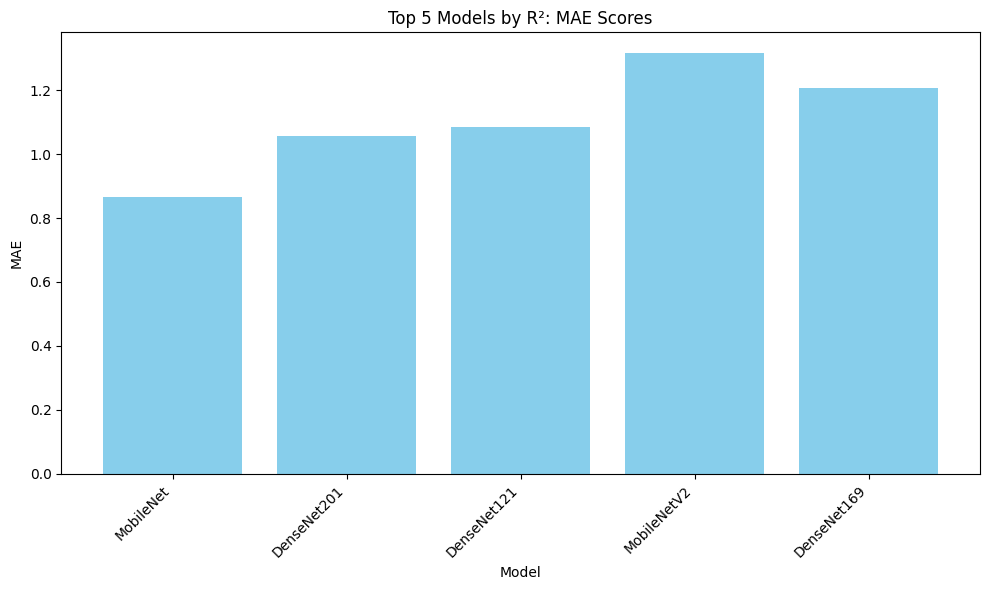

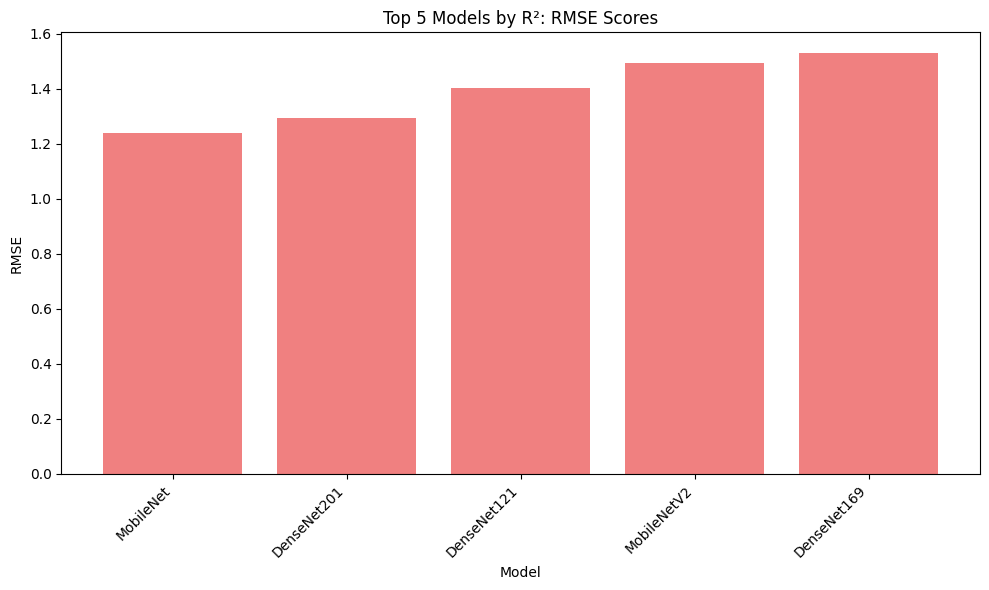

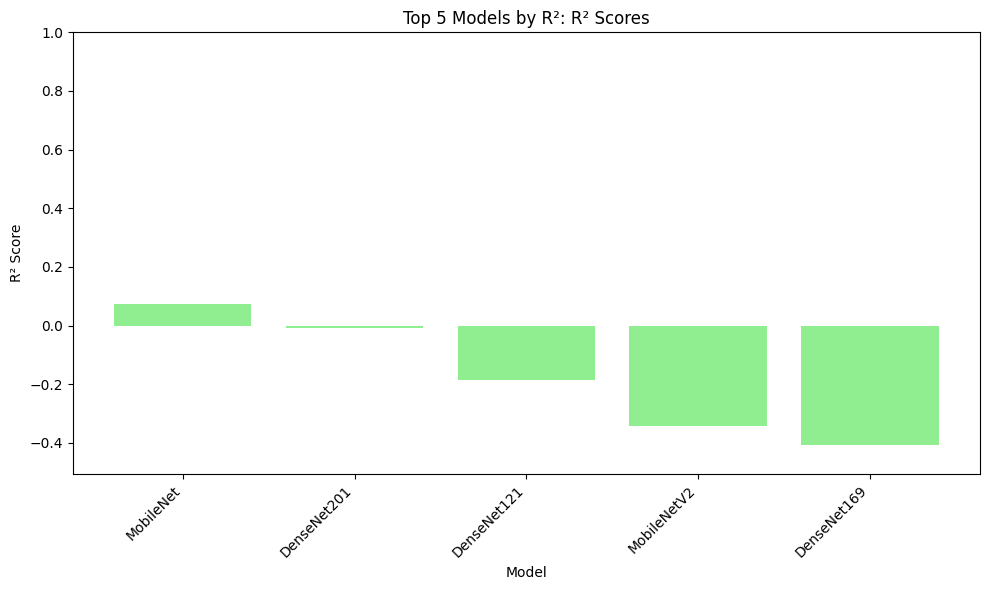

In [139]:
import matplotlib.pyplot as plt

# Sort results by R2 score in descending order and select the top 5 models
top_5_models = results_df.sort_values(by='R2', ascending=False).head(5)

print("Top 5 Models by R2 Score:")
print(top_5_models)

# Create bar plots for MAE, RMSE, and R2

# Plot MAE
plt.figure(figsize=(10, 6))
plt.bar(top_5_models['Model'], top_5_models['MAE'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Top 5 Models by R²: MAE Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(10, 6))
plt.bar(top_5_models['Model'], top_5_models['RMSE'], color='lightcoral')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Top 5 Models by R²: RMSE Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot R2 Score
plt.figure(figsize=(10, 6))
plt.bar(top_5_models['Model'], top_5_models['R2'], color='lightgreen')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Top 5 Models by R²: R² Scores')
plt.ylim(min(0, top_5_models['R2'].min() - 0.1), max(1, top_5_models['R2'].max() + 0.1)) # Ensure R2 y-axis is sensible
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()